In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

# 전체 컬럼, 전체 행, 전체 숫자 출력
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

# plot 출력
%matplotlib inline

# plot 한글출력
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'NanumGothic']:
        plt.rcParams['font.family'] = font.name
    break


# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [10]:
show = pd.read_html('Theaters_crawled_files/상영내역-CGV%20판교.html')

In [11]:
# show[0]

In [12]:
df = show[1]
print(df.shape)
df.sample()

(10743, 13)


,상영일자,상영관,1회,2회,3회,4회,5회,6회,7회,8회,9회,10회,11회
9265,2019-04-03,07관,"09:30, 캡틴 마블(디지털), 10,000원","11:55, 덤보(디지털), 12,000원","14:15, 캡틴 마블(디지털), 12,000원","16:50, 샤잠!(디지털), 12,000원","19:30, 샤잠!(디지털), 12,000원","22:10, 샤잠!(디지털), 12,000원",NaN,NaN,NaN,NaN,NaN


In [7]:
# 상영일자에서 요일 정보 컬럼 만들기 -> 주중(월화수목) 주말(금토일) 로 나누기
# 상영시각 따로 떼서 어느 그룹에 들어가는지 확인
# 영화별로 해당 날짜에 그룹별 상영횟수 카운트

In [13]:
# # 상영일자에서 요일 정보 컬럼 만들기 -> 주중(월화수목) 주말(금토일) 로 나누기
# df['상영일자'] = pd.to_datetime(df['상영일자'])
# df['year'] = df['상영일자'].dt.year
# df['month'] = df['상영일자'].dt.month
# df['day'] = df['상영일자'].dt.day
# df['dayofweek'] = df['상영일자'].dt.dayofweek

# df['주말'] = 0
# df.loc[df['dayofweek'] == 4, '주말'] = 1 
# df.loc[df['dayofweek'] == 5, '주말'] = 1 
# df.loc[df['dayofweek'] == 6, '주말'] = 1 

# df[['상영일자', 'year', 'month', 'day', 'dayofweek', '주말']]

In [10]:
df.isnull().sum()

상영일자             0
상영관              0
1회              44
2회              31
3회              14
4회              23
5회              32
6회             143
7회            1893
8회            7312
9회           10311
10회          10719
11회          10740
year             0
month            0
day              0
dayofweek        0
주말               0
dtype: int64

In [11]:
df

,상영일자,상영관,1회,2회,3회,4회,5회,6회,7회,8회,9회,10회,11회,year,month,day,dayofweek,주말
0,2015-08-19,01관,NaN,"13:20, 매드 맥스: 분노의 도로(3D 디지털)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,8,19,2,0
1,2015-08-19,02관(SCREENX),NaN,"14:50, 차이나타운(디지털)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,8,19,2,0
2,2015-08-19,03관,"12:20, 뷰티 인사이드(디지털)","15:20, 치외법권(디지털)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,8,19,2,0
3,2015-08-19,04관,NaN,"13:50, 극비수사(디지털)","16:20, 연평해전(디지털)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,8,19,2,0
4,2015-08-19,IMAX,"11:50, 인터스텔라(IMAX)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,8,19,2,0
5,2015-08-19,4DX,"12:50, 샌 안드레아스(4D)","15:50, 매드 맥스: 분노의 도로(4D)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,8,19,2,0
6,2015-08-19,07관,NaN,"14:20, 퇴마: 무녀굴(디지털)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,8,19,2,0
7,2015-08-20,01관,"11:50, 미니언즈(디지털더빙), 10,000원","14:10, 미션 임파서블: 로그네이션(디지털), 10,000원","17:10, 미션 임파서블: 로그네이션(디지털), 10,000원",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,8,20,3,0
8,2015-08-20,02관(SCREENX),"11:10, 뷰티 인사이드(디지털), 10,000원","14:00, 뷰티 인사이드(디지털), 10,000원","16:50, 뷰티 인사이드(디지털), 10,000원",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,8,20,3,0
9,2015-08-20,03관,"12:40, 암살(디지털), 10,000원","15:50, 암살(디지털), 10,000원",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,8,20,3,0


액션이나 판타지는 4D 상영관에 배정되어 매출액이 더 커진다

In [16]:
# timetable_spread = pd.DataFrame()
data = df.iloc[1][['상영일자', '상영관']]
data['상영시각'] = '12:10'
timetable_spread = timetable_spread.append(data, ignore_index=True)
timetable_spread

,상영관,상영시각,상영일자
0,02관(SCREENX),12:10,2015-08-19


In [19]:
df.shape

(10743, 18)

In [14]:
df.sample()

,상영일자,상영관,1회,2회,3회,4회,5회,6회,7회,8회,9회,10회,11회
3275,2016-11-28,07관,"08:25, 테일 오브 테일즈(디지털), 6,000원","11:10, 카페 6(디지털), 11,000원","13:20, 닥터 스트레인지(디지털), 11,000원","15:45, 테일 오브 테일즈(디지털), 11,000원","18:30, 신비한 동물사전(디지털), 11,000원","21:10, 신비한 동물사전(디지털), 11,000원","23:50, 신비한 동물사전(디지털), 10,000원",NaN,NaN,NaN,NaN


In [17]:
df_dict = df.T.to_dict()
df_dict[0]['1회']

nan

In [19]:
a = list()
a.append(1)
a

[1]

In [32]:
df.sample()

,상영일자,상영관,1회,2회,3회,4회,5회,6회,7회,8회,9회,10회,11회
8119,2018-10-22,02관(SCREENX),"08:20, 베놈(디지털), 7,000원","10:30, 베놈(디지털), 12,000원","12:45, 베놈(디지털), 12,000원","15:00, 베놈(디지털), 12,000원","17:15, 베놈(디지털), 12,000원","19:30, 베놈(디지털), 12,000원","21:45, 베놈(디지털), 12,000원","24:00, 베놈(디지털), 11,000원",NaN,NaN,NaN


In [ ]:
def concat_timetable(name):
    screens_filename = name.strip().replace(' ', '%20').replace('(', '%28').replace(')', '%29')
    information_filename = name.strip().replace(' ', '_20').replace('(', '_28').replace(')', '_29')
    time = pd.read_html(f'상영내역-{screens_filename}.html')[1]
    information_df = pd.read_html(f'상영관정보-{information_filename}.html', encoding='utf-8')
    capacity = information_df[1].T.drop('스크린코드', axis=0).rename(columns={0:'상영관', 1:'좌석수'})
    time.merge(capacity, how='left', on='상영관').to_csv(f'../Theaters_merged_files/{screens_filename}.csv', index=False)

In [ ]:
# for nm in code['영화상영관명'][300:450]:
# 위에서 지정해준 인덱스 숫자 n과 m을 사용해 code['영화상영관명'][n:m] 으로 변경
for name in code['영화상영관명'][301:450]:
    try:
        print(name, '처리 시도 중...')
        timetable_preprocessing(name)
        print(name, '완료')
    except ValueError as e:
        print('[Error]', e)
print('*** 완료!!! ***')

In [36]:
# def timetable_preprocessing():
# 상영시각 따로 떼서 어느 그룹에 들어가는지 확인 [날짜, 상영관, 상영시각, 영화명, 가격] + [상영시각 등급]
timetable_spread = list() # 리스트
df_dict = df.T.to_dict()

for i in df_dict: # row 를 dict 로, 컬럼도 추려서
#     if i % 1000 == 0:
#         print(i + 1)

#     if i == 50 : break # 테스트 코드

    row = df_dict[i]

    for n in range(1, 12):
        if pd.isna(row[f'{n}회']):
            continue

        detail = row[f'{n}회'].split(', ')

        # 튜플이나 딕셔너리
        data = dict()
        data['상영관'] = row['상영관']
        data['상영일자'] = row['상영일자']
        data['상영시각'] = detail[0]
        data['영화명'] = detail[1]

        if len(detail) > 2:
            data['가격'] = detail[-1]

        # 리스트에 append
        timetable_spread.append(data)
#     data['1회_상영시각'] = df['1회'].apply(lambda x: str(x).split(',')[0])

print('*** 완료!!! ***')

timetable_spread = pd.DataFrame(timetable_spread)
timetable_spread = timetable_spread

*** 완료!!! ***


In [37]:
print(timetable_spread.shape)
timetable_spread.sample()

(76911, 5)


,가격,상영관,상영시각,상영일자,영화명
64417,"13,000원",01관,10:15,2019-02-22,극한직업(디지털)


In [63]:
'24:01' > '24:00'
'10:00' > '09:30'

True

In [62]:
timetable_spread['상영시각'].value_counts()

09:00    803
10:00    747
09:30    652
19:00    632
08:30    621
09:50    618
09:40    603
08:00    599
09:20    586
09:10    557
14:00    547
14:20    543
14:30    537
18:00    533
13:50    532
20:00    531
19:40    524
12:00    520
24:30    520
19:30    519
11:00    516
08:40    515
17:00    508
14:10    501
09:55    487
22:30    486
13:40    484
12:10    480
19:20    474
19:10    473
        ... 
26:20     22
26:15     21
06:20     17
26:05     16
26:30     13
06:35     10
06:00      9
26:40      8
06:10      7
27:00      6
26:25      6
06:25      5
27:10      4
26:35      4
27:20      3
28:15      3
26:50      3
27:05      3
06:15      3
26:45      2
27:35      2
27:30      2
26:55      1
28:00      1
29:10      1
29:20      1
27:25      1
28:30      1
28:05      1
28:45      1
Name: 상영시각, Length: 265, dtype: int64

In [28]:
timetable_spread.to_csv('상영내역_판교cgv_test.csv', index=False)

In [22]:
timetable_spread = pd.read_csv('상영내역_판교cgv_test.csv')

In [23]:
timetable_spread

,상영관,상영시각,상영일자,영화명,가격
0,01관,13:20,2015-08-19,매드 맥스: 분노의 도로(3D 디지털),NaN
1,02관(SCREENX),14:50,2015-08-19,차이나타운(디지털),NaN
2,03관,12:20,2015-08-19,뷰티 인사이드(디지털),NaN
3,03관,15:20,2015-08-19,치외법권(디지털),NaN
4,04관,13:50,2015-08-19,극비수사(디지털),NaN
5,04관,16:20,2015-08-19,연평해전(디지털),NaN
6,IMAX,11:50,2015-08-19,인터스텔라(IMAX),NaN
7,4DX,12:50,2015-08-19,샌 안드레아스(4D),NaN
8,4DX,15:50,2015-08-19,매드 맥스: 분노의 도로(4D),NaN
9,07관,14:20,2015-08-19,퇴마: 무녀굴(디지털),NaN


In [24]:
# 상영시각 등급
timetable_spread.loc[timetable_spread['상영시각'] > '24:00', '상영시각등급'] = '나이트'
timetable_spread.loc[timetable_spread['상영시각'] <= '24:00', '상영시각등급'] = '문라이트'
timetable_spread.loc[timetable_spread['상영시각'] <= '22:00', '상영시각등급'] = '프라임'
timetable_spread.loc[timetable_spread['상영시각'] <= '16:00', '상영시각등급'] = '데이라이트'
timetable_spread.loc[timetable_spread['상영시각'] <= '13:00', '상영시각등급'] = '브런치'
timetable_spread.loc[timetable_spread['상영시각'] <= '10:00', '상영시각등급'] = '모닝'

timetable_spread.sample(5)

,상영관,상영시각,상영일자,영화명,가격,상영시각등급
12413,IMAX,10:25,2016-04-27,캡틴 아메리카: 시빌 워(IMAX 3D),"17,000원",브런치
56828,4DX,10:50,2018-09-25,안시성(4D),"12,000원",브런치
58602,02관(SCREENX),17:35,2018-10-28,창궐(디지털),"13,000원",프라임
60497,IMAX,13:05,2018-12-04,국가부도의 날(디지털),"12,000원",데이라이트
43583,01관,14:00,2018-01-08,1987(디지털),"11,000원",데이라이트


In [25]:
timetable_spread['상영시각등급'].value_counts()

프라임      25482
데이라이트    12930
브런치      11988
모닝       11896
문라이트      8264
나이트       6351
Name: 상영시각등급, dtype: int64

In [26]:
timetable_spread['영화관'] = 'CGV판교'
timetable_spread.sample()

,상영관,상영시각,상영일자,영화명,가격,상영시각등급,영화관
25671,04관,19:35,2017-01-17,어쌔신 크리드(디지털),"10,000원",프라임,CGV판교


상영관-상영시각등급 카운트

In [27]:
timetable_spread[(timetable_spread['영화명'].str.contains('서치')) & (timetable_spread['가격'].isnull())]

,상영관,상영시각,상영일자,영화명,가격,상영시각등급,영화관
56416,02관(SCREENX),24:50,2018-09-18,서치(디지털),NaN,나이트,CGV판교
56529,04관,08:40,2018-09-20,서치(디지털),NaN,모닝,CGV판교
56566,02관(SCREENX),08:10,2018-09-21,서치(디지털),NaN,모닝,CGV판교
57308,04관,24:40,2018-10-04,서치(디지털),NaN,나이트,CGV판교


In [28]:
timetable_spread['영화명'].apply(lambda x: x.split('(')[0])

0          매드 맥스: 분노의 도로
1                  차이나타운
2                뷰티 인사이드
3                   치외법권
4                   극비수사
5                   연평해전
6                  인터스텔라
7                샌 안드레아스
8          매드 맥스: 분노의 도로
9                퇴마: 무녀굴
10                  미니언즈
11        미션 임파서블: 로그네이션
12        미션 임파서블: 로그네이션
13               뷰티 인사이드
14               뷰티 인사이드
15               뷰티 인사이드
16                    암살
17                    암살
18                   베테랑
19               인사이드 아웃
20                   베테랑
21                   베테랑
22                   베테랑
23                   베테랑
24                판타스틱 4
25                판타스틱 4
26                판타스틱 4
27                미쓰 와이프
28               퇴마: 무녀굴
29               퇴마: 무녀굴
              ...       
76881      터미네이터: 다크 페이트
76882             날씨의 아이
76883             날씨의 아이
76884             날씨의 아이
76885             날씨의 아이
76886             날씨의 아이
76887             날씨의 아이
76888             날씨의 아이
76889                 조커


In [29]:
timetable_spread['상영분류'] = timetable_spread['영화명']
timetable_spread['상영분류'] = timetable_spread['상영분류'].apply(lambda x: x.split('(')[1].replace(')', '') if len(x.split('(')) > 1 else np.nan)
timetable_spread['영화명'] = timetable_spread['영화명'].apply(lambda x: x.split('(')[0])
timetable_spread.sample()

,상영관,상영시각,상영일자,영화명,가격,상영시각등급,영화관,상영분류
17792,07관,15:10,2016-08-12,부산행,"12,000원",데이라이트,CGV판교,디지털


In [31]:
timetable_spread = timetable_spread[['영화명', '영화관', '상영관', '상영분류', '상영일자', '상영시각', '상영시각등급', '가격']]

print(timetable_spread.shape)
timetable_spread.sample()

(76911, 8)


,영화명,영화관,상영관,상영분류,상영일자,상영시각,상영시각등급,가격
17709,덕혜옹주,CGV판교,03관,디지털,2016-08-11,19:50,프라임,"11,000원"


In [30]:
timetable_spread['상영분류'].value_counts()

디지털        56257
4D          7907
IMAX        4218
IMAX 3D     3895
디지털더빙       2497
ScreenX     1006
4D더빙         389
확장판           49
3D 디지털        38
3D 더빙          5
Name: 상영분류, dtype: int64

In [49]:
# data = timetable_spread.groupby(['주말', '상영시각등급'])['상영일자'].size().reset_index()
# time_order = ['모닝', '브런치', '데이라이트', '프라임', '문라이트', '나이트']
# sns.lineplot(x='상영시각등급', y='상영일자', hue='주말', data=data)

In [75]:
data = timetable_spread.groupby(['영화명', '상영시각등급'])['상영일자'].size().reset_index()
data = data.rename(columns={'상영일자':'상영횟수'})
data['상영횟수전체'] = data.groupby('영화명')['상영횟수'].transform(lambda x: x.sum())

In [39]:
timetable_spread['상영일자']
# 상영일자에서 요일 정보 컬럼 만들기 -> 주중(월화수목) 주말(금토일) 로 나누기
timetable_spread['상영일자'] = pd.to_datetime(timetable_spread['상영일자'])
timetable_spread['year'] = timetable_spread['상영일자'].dt.year
timetable_spread['month'] = timetable_spread['상영일자'].dt.month
timetable_spread['day'] = timetable_spread['상영일자'].dt.day
timetable_spread['dayofweek'] = timetable_spread['상영일자'].dt.dayofweek

timetable_spread['주말'] = 0
# timetable_spread.loc[timetable_spread['dayofweek'] == 4, '주말'] = 1 # 금요일도 주중이니까 시간대 분류를 위해
timetable_spread.loc[timetable_spread['dayofweek'] == 5, '주말'] = 1 
timetable_spread.loc[timetable_spread['dayofweek'] == 6, '주말'] = 1 

timetable_spread[['상영일자', 'year', 'month', 'day', 'dayofweek', '주말']]

,상영일자,year,month,day,dayofweek,주말
0,2015-08-19,2015,8,19,2,0
1,2015-08-19,2015,8,19,2,0
2,2015-08-19,2015,8,19,2,0
3,2015-08-19,2015,8,19,2,0
4,2015-08-19,2015,8,19,2,0
5,2015-08-19,2015,8,19,2,0
6,2015-08-19,2015,8,19,2,0
7,2015-08-19,2015,8,19,2,0
8,2015-08-19,2015,8,19,2,0
9,2015-08-19,2015,8,19,2,0


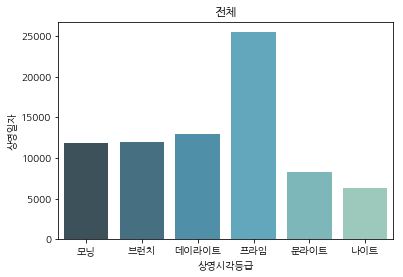

In [89]:
data = timetable_spread.groupby('상영시각등급')['상영일자'].size().reset_index()
time_order = ['모닝', '브런치', '데이라이트', '프라임', '문라이트', '나이트']
sns.barplot(x='상영시각등급', y='상영일자', data=data, order=time_order, palette='GnBu_d')
plt.title('전체')
plt.show()

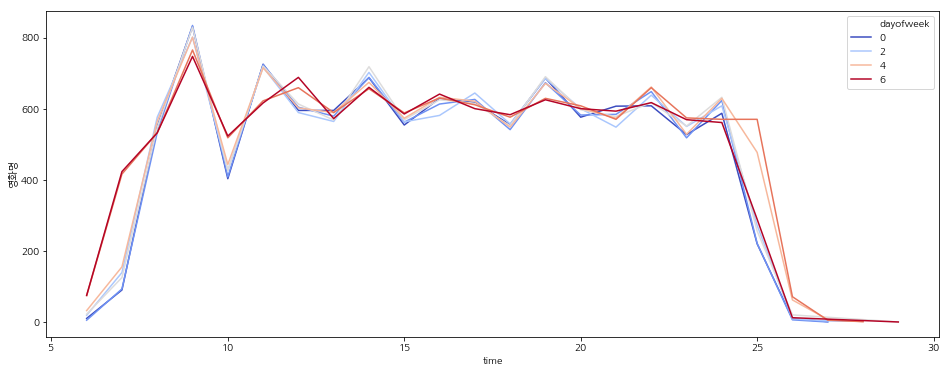

In [99]:
# timetable_spread['time'] = timetable_spread['상영시각'].apply(lambda x: int(x.split(':')[0]))

data = timetable_spread.groupby(['time', 'dayofweek'])['영화명'].size().reset_index()
plt.figure(figsize=[16, 6])
sns.lineplot(x='time', y='영화명', hue='dayofweek', data=data, palette='coolwarm')
plt.show()

- 월화수목 프라임 
- 금 프라임, 문라이트, 나이트
- 토 모닝, 브런치, 데이라이트, 프라임, 문라이트, 나이트
- 일 모닝, 브런치, 데이라이트, 프라임, 문라이트

의외로 평일 모닝 타임에 상영횟수가 많음

In [100]:
timetable_spread

,상영관,상영시각,상영일자,영화명,가격,상영시각등급,영화명(분류),year,month,day,dayofweek,주말,time
0,01관,13:20,2015-08-19,매드 맥스: 분노의 도로,NaN,데이라이트,매드 맥스: 분노의 도로(3D 디지털),2015,8,19,2,0,13
1,02관(SCREENX),14:50,2015-08-19,차이나타운,NaN,데이라이트,차이나타운(디지털),2015,8,19,2,0,14
2,03관,12:20,2015-08-19,뷰티 인사이드,NaN,브런치,뷰티 인사이드(디지털),2015,8,19,2,0,12
3,03관,15:20,2015-08-19,치외법권,NaN,데이라이트,치외법권(디지털),2015,8,19,2,0,15
4,04관,13:50,2015-08-19,극비수사,NaN,데이라이트,극비수사(디지털),2015,8,19,2,0,13
5,04관,16:20,2015-08-19,연평해전,NaN,프라임,연평해전(디지털),2015,8,19,2,0,16
6,IMAX,11:50,2015-08-19,인터스텔라,NaN,브런치,인터스텔라(IMAX),2015,8,19,2,0,11
7,4DX,12:50,2015-08-19,샌 안드레아스,NaN,브런치,샌 안드레아스(4D),2015,8,19,2,0,12
8,4DX,15:50,2015-08-19,매드 맥스: 분노의 도로,NaN,데이라이트,매드 맥스: 분노의 도로(4D),2015,8,19,2,0,15
9,07관,14:20,2015-08-19,퇴마: 무녀굴,NaN,데이라이트,퇴마: 무녀굴(디지털),2015,8,19,2,0,14


In [76]:
data[data['상영시각등급'] == '프라임']

,영화명,상영시각등급,상영횟수,상영횟수전체
0,007 스펙터,나이트,18,208
1,007 스펙터,데이라이트,37,208
2,007 스펙터,모닝,26,208
3,007 스펙터,문라이트,15,208
4,007 스펙터,브런치,34,208
5,007 스펙터,프라임,78,208
6,12 솔져스,나이트,14,83
7,12 솔져스,데이라이트,13,83
8,12 솔져스,모닝,14,83
9,12 솔져스,문라이트,8,83


데이터를 영화별로 저장해야하나?

In [105]:
timetable_spread.groupby(['영화명', 'dayofweek'])['상영시각'].size()

영화명             dayofweek
  007 스펙터       0            24
                1            25
                2            36
                3            30
                4            30
                5            32
                6            31
  12 솔져스        0            11
                1            11
                2            14
                3            10
                4            12
                5            13
                6            12
  13시간          0             3
                1             1
                2             2
                3             3
                4             3
                5             3
                6             3
  1919 유관순      0             2
                1             2
                2             1
                3             3
                4             3
                5             3
                6             4
  1987          0            46
                1            41
              

In [ ]:
# 영화별로 해당 날짜에 그룹별 상영횟수 카운트

In [103]:
timetable_spread[timetable_spread['dayofweek'] == 0].groupby(['영화명', '상영시각등급'])['상영시각'].size().reset_index()
timetable_spread[timetable_spread['dayofweek'] == 1].groupby(['영화명', '상영시각등급'])['상영시각'].size().reset_index()
timetable_spread[timetable_spread['dayofweek'] == 2].groupby(['영화명', '상영시각등급'])['상영시각'].size().reset_index()
timetable_spread[timetable_spread['dayofweek'] == 3].groupby(['영화명', '상영시각등급'])['상영시각'].size().reset_index()

,영화명,상영시각등급,상영시각
0,007 스펙터,나이트,18
1,007 스펙터,데이라이트,37
2,007 스펙터,모닝,26
3,007 스펙터,문라이트,15
4,007 스펙터,브런치,34
5,007 스펙터,프라임,78
6,12 솔져스,나이트,14
7,12 솔져스,데이라이트,13
8,12 솔져스,모닝,14
9,12 솔져스,문라이트,8


In [107]:
timetable_spread['가격'].isnull().sum()

1324

In [50]:
timetable_spread['가격'].value_counts()

 12,000원         20412
 11,000원         17264
 13,000원          9265
 10,000원          7705
 7,000원           3758
 6,000원           3154
 9,000원           3143
 8,000원           3013
 15,000원          1175
 16,000원          1014
 14,000원           936
 18,000원           815
 20,000원           731
 17,000원           665
 21,000원           399
 5,000원            337
 19,000원           318
 6,500원            291
대동여지도(디지털)         140
 7,500원            136
 0원                130
보러와요(디지털)          103
미스터 리(디지털)         103
 4,000원             82
거기 있어줄래요(디지털)       68
 11,500원            52
 10,500원            48
바다(디지털)             43
소리(디지털)             40
 9,500원             31
 12,500원            25
이것이 인생!(디지털)        23
웬디(디지털)             20
어게인(디지털)            19
토냐(디지털)             14
나의 소울메이트(디지털)       13
결혼(디지털)             12
계(디지털)              12
 8,500원             10
약속의 장소(디지털)          9
시저!(디지털)             8
미스터 브래드(디지털)         7
밥(디지털)               7
 9,100원    

In [115]:
# timetable_spread[timetable_spread['가격'] == '바다(디지털)']
timetable_spread['가격'].dtypes

dtype('O')

영화별로 loc로 상영시각 가져오기

In [117]:
timetable_spread['영화명'].value_counts().reset_index()

,index,영화명
0,알라딘,1211
1,어벤져스: 인피니티 워,897
2,보헤미안 랩소디,885
3,어벤져스: 엔드게임,838
4,극한직업,699
5,닥터 스트레인지,687
6,캡틴 마블,668
7,캡틴 아메리카: 시빌 워,647
8,엑시트,629
9,미녀와 야수,626


In [51]:
# df['2회'][0]
# df['2회'][0].split(',')[1].split('(')[0]
# str(df['1회'][0]).split(',')[1].split('(')[0]
# # df.loc[str(df['1회']).split(',')[1].split('(')[0] == ' 매드 맥스: 분노의 도로', '1회']

In [56]:
s = pd.read_csv('screen_show_seat_updated.csv')
print(s.shape)
s.sample()

(58814, 17)


,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
33849,23,작은 엄마 2: 삼촌의 여자들,2017-12-20,1,0.0%,5000,5000,1,1,2017-12-20,21,0.7%,0.01%,140,27,1,0.009%


In [58]:
len(s[s['누적관객수'] == 1])

900

In [67]:
acc_audi = s.groupby(['영화명'])['누적관객수'].max().reset_index()
movie_list_less_than_519 = list(acc_audi[acc_audi['누적관객수'] < 519].index)
movie_list_less_than_519

[0,
 1,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 48,
 50,
 51,
 53,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 152,
 153,
 155,
 156,
 157,
 158,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 187,
 188,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 208

In [72]:
sss = s.drop(movie_list_less_than_519)
print(sss.shape)
sss.sample()

(55497, 17)


,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,순위,상영횟수,상영점유율
11571,9,울보,2016-01-28,8,0.5%,165000,3752900,22,473,2016-02-01,10,2.6%,0.03%,842,9,8,0.16%


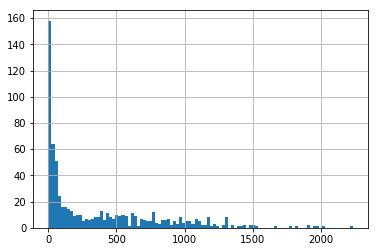

In [38]:
# df = pd.read_csv('../01.Data_Collection/films_updated.csv')
# %matplotlib inline
df['전국스크린수'].hist(bins=100)

In [73]:
sss = sss.rename(columns={'순위':'상영점유율순위'})

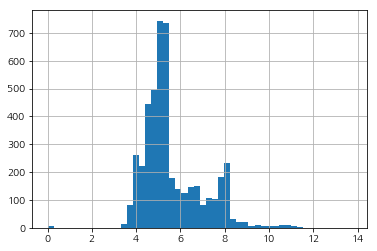

In [84]:
data = sss.groupby('영화명')['좌석수'].median().reset_index()
data['좌석수(log)'] = data['좌석수'].apply(lambda x: np.log(x) if x != 0 else 0)
data['좌석수(log)'].hist(bins=50)

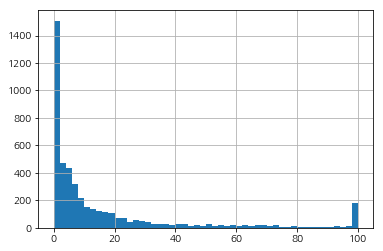

In [87]:
sss['좌석판매율(float)'] = sss['좌석판매율'].apply(lambda x: float(x.replace('%', '')))
data = sss.groupby('영화명')['좌석판매율(float)'].median().reset_index()
data['좌석판매율(float)'].hist(bins=50)

In [91]:
sss[sss['관객수'] == 0]

,스크린점유율순위,영화명,개봉일,스크린수,스크린점유율,매출액,누적매출액,관객수,누적관객수,점유율집계일,좌석판매점유율순위,좌석판매율,좌석점유율,좌석수,상영점유율순위,상영횟수,상영점유율,좌석판매율(float)
967,20,부산지역 대학 작품 상영 01,NaN,1,0.0%,0,0,0,0,2015-02-02,19,0.0%,0.01%,212,23,1,0.012%,0.000000
994,20,영건 탐정사무소,2012-08-30,1,0.0%,0,7177000,0,957,2015-02-03,30,0.0%,0%,98,25,1,0.012%,0.000000
995,20,고스톱 살인,2014-03-20,1,0.0%,0,5479500,0,820,2015-02-03,30,0.0%,0%,98,25,1,0.012%,0.000000
1625,19,숫호구,2014-08-07,1,0.1%,0,16348000,0,2117,2015-02-24,27,0.0%,0%,98,24,1,0.016%,0.000000
1808,15,목숨,2014-12-04,1,0.1%,0,291066600,0,37948,2015-03-03,13,0.0%,0.01%,143,18,1,0.033%,0.000000
1842,18,누구에게나 찬란한,2014-11-06,1,0.1%,0,143391900,0,20999,2015-03-04,14,0.0%,0.01%,143,19,1,0.033%,0.000000
2004,15,원나잇 온리,2014-07-03,1,0.1%,0,21923300,0,2909,2015-03-09,15,0.0%,0.01%,286,14,2,0.035%,0.000000
2005,15,부산지역 대학 작품 상영 05,NaN,1,0.1%,0,0,0,0,2015-03-09,15,0.0%,0.01%,212,22,1,0.018%,0.000000
2041,19,원나잇 온리,2014-07-03,1,0.1%,0,21923300,0,2909,2015-03-10,17,0.0%,0.02%,429,15,3,0.053%,0.000000
2070,20,오늘의 연애,2015-01-14,1,0.1%,0,14924654487,0,1891993,2015-03-11,21,0.0%,0.01%,222,27,1,0.018%,0.000000


In [90]:
len(sss[sss['좌석판매율(float)'] == 0])
len(sss[sss['관객수'] == 0])

1789

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000246E5801F60>]],
      dtype=object)

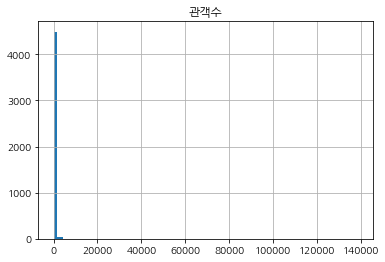

In [94]:
data = sss.groupby('영화명')['관객수'].median().reset_index()
data.hist(bins=100)